In [47]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [48]:
np.random.seed(2019)

In [49]:
(train_img, train_label), (test_img, test_label) = mnist.load_data()

In [50]:
train_img = train_img / 255.
test_img = test_img / 255.

In [51]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [67]:
LEARNING_RATE = .0001
LIMIT_EPOCHS = int(1e4)

def scheduler(epoch):
  if epoch < 10:
    return LEARNING_RATE
  else:
    return LEARNING_RATE * tf.math.exp(0.1 * (10 - epoch))

In [64]:
model.compile(optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [65]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                  min_delta=1e-2, 
                                  patience=2, 
                                  verbose=0, 
                                  mode='min', 
                                  baseline=None, 
                                  restore_best_weights=True),
    keras.callbacks.LearningRateScheduler(scheduler)
]

In [66]:
model.fit(x=train_img, y=train_label, 
          validation_data=(test_img, test_label),  
          batch_size=64, epochs=LIMIT_EPOCHS, 
          use_multiprocessing=True, workers=4,
          shuffle=True, 
          callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1450 - acc: 0.9596 - val_loss: 0.1461 - val_acc: 0.9586
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1356 - acc: 0.9624 - val_loss: 0.1398 - val_acc: 0.9593
Epoch 3/10
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1274 - acc: 0.9647 - val_loss: 0.1325 - val_acc: 0.9608
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1201 - acc: 0.9664 - val_loss: 0.1285 - val_acc: 0.9627
Epoch 5/10
22592/60000 [==========>...................] - ETA: 1s - loss: 0.1154 - acc: 0.9687

KeyboardInterrupt: 

In [23]:
model.save("mnist_model")

In [3]:
model = tf.keras.models.load_model("mnist_model.tf")

W0829 12:59:52.355545 4531946944 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0829 12:59:52.356968 4531946944 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
import cv2
import matplotlib.pyplot as plt

In [28]:
PATH_IMG = 'example5.png'

In [29]:
img_test = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)

In [17]:
img_test = cv2.resize(img_test, (28, 28), interpolation=cv2.INTER_CUBIC)

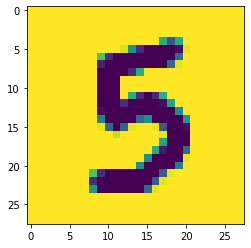

In [30]:
plt.imshow(img_test)

In [32]:
img_test = img_test / 255.

In [31]:
img_test.shape

(28, 28)

In [34]:
predict = model.predict(img_test.reshape(1,28,28))

In [95]:
test_label[0:1]

array([7], dtype=uint8)